## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wan-chu/.local/lib/python3.6/site-packages/tensorflow/py

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
from keras.layers import Dropout

def build_mlp(input_shape,output_units=10,n_neurons=[512,256,128],drp_ratio=0.2):
    
    input_layer=keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(n_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units, 
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1))(input_layer)
            x=Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=n_units, 
                                 activation='relu', 
                                 name='hidden_layer'+str(i+1))(x)
            x=Dropout(drp_ratio)(x)
    
    out=keras.layers.Dense(units=output_units, activation='softmax', name='output_layer')(x)
    
    model=keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE=1e-4
BATCH_SIZE=64
EPOCHS=50
DRP_RATIO=[.2,.5,.7]

In [9]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp_ratio in DRP_RATIO:
    print('Experiment with drp_ratio=%.6f' % (drp_ratio))
    keras.backend.clear_session()
    model=build_mlp(input_shape=x_train.shape[1:],drp_ratio=drp_ratio)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(x_test, y_test),shuffle=True)
        
    exp_name='exp-drp_ratio-%s' %(str(drp_ratio))
        
    results[exp_name]=model.history.history

Experiment with drp_ratio=0.200000

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 385us/step - loss: 2.0070 - acc: 0.2572 - val_loss: 1.8120 - val_acc: 0.3475
Epoch 2/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.8678 - acc: 0.3168 - val_loss: 1.7723 - val_acc: 0.3721
Epoch 3/50
50000/50000 [==============================] - 19s 376us/step - loss: 1.8169 - acc: 0.3401 - val_loss: 1.7523 - val_acc: 0.3759
Epoch 4/50
50000/50000 [==============================] - 21s 415us/step - loss: 1.7859 - acc: 0.3523 - val_loss: 1.7435 - val_acc: 0.3789
Epoch 5/50
50000/50000 [==============================] - 20s 396us/step - loss: 1.7668 - acc: 0.3599 - val_loss: 1.6761 - val_acc: 0.4035
Epoch 6/5

50000/50000 [==============================] - 18s 364us/step - loss: 2.2714 - acc: 0.1310 - val_loss: 2.2172 - val_acc: 0.1627
Epoch 2/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.2231 - acc: 0.1368 - val_loss: 2.1435 - val_acc: 0.1772
Epoch 3/50
50000/50000 [==============================] - 18s 355us/step - loss: 2.1846 - acc: 0.1551 - val_loss: 2.1403 - val_acc: 0.1919
Epoch 4/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.1722 - acc: 0.1590 - val_loss: 2.1176 - val_acc: 0.1869
Epoch 5/50
50000/50000 [==============================] - 18s 357us/step - loss: 2.1699 - acc: 0.1591 - val_loss: 2.1248 - val_acc: 0.1893
Epoch 6/50
50000/50000 [==============================] - 18s 350us/step - loss: 2.1666 - acc: 0.1601 - val_loss: 2.1315 - val_acc: 0.1836
Epoch 7/50
50000/50000 [==============================] - 18s 355us/step - loss: 2.1649 - acc: 0.1644 - val_loss: 2.1170 - val_acc: 0.1911
Epoch 8/50
50000/50000 [==============

Epoch 6/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.3031 - acc: 0.0975 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.3028 - acc: 0.0979 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 18s 357us/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 18s 354us/step - loss: 2.3028 - acc: 0.0976 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 18s 353us/step - loss: 2.3030 - acc: 0.0985 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.3027 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 18s 352us/step - loss: 2.3027 - acc: 0.0974 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 13/50
50000/50000 

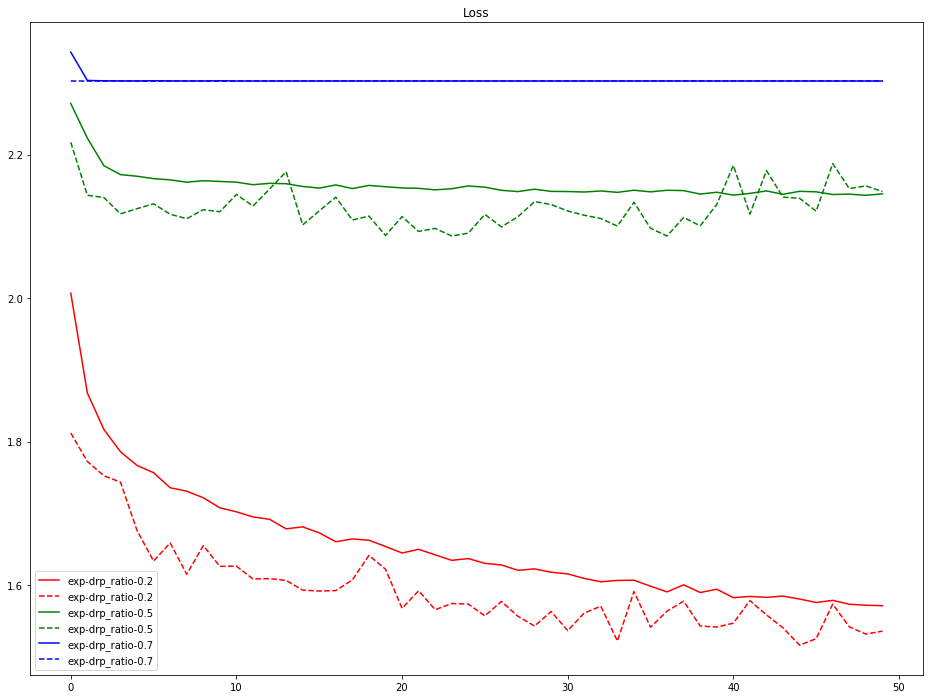

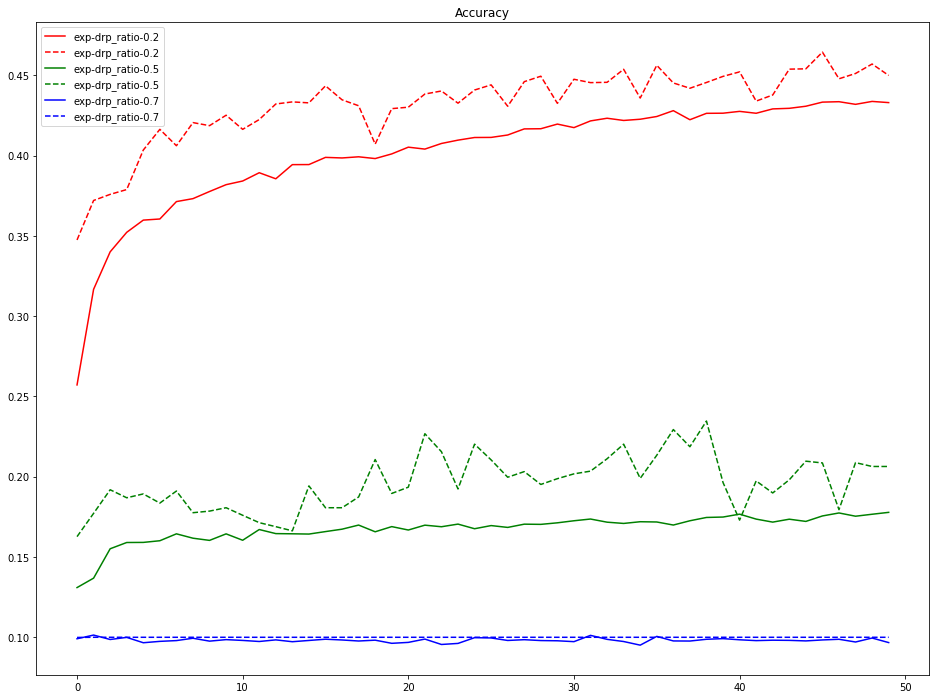

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "darkorange"]

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['loss'])),results[con]['loss'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_loss'])),results[con]['val_loss'], '--', label=con, color=color_bar[i])
plt.title('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i,con in enumerate(results.keys()):
    plt.plot(range(len(results[con]['acc'])),results[con]['acc'], '-', label=con, color=color_bar[i])
    plt.plot(range(len(results[con]['val_acc'])),results[con]['val_acc'], '--', label=con, color=color_bar[i])
plt.title('Accuracy')
plt.legend()
plt.show()